In [1]:
# Import modules
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from minisom import MiniSom
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

In [2]:
# Constants
# Inizializzazione del dataset e dei parametri
DATA_PATH = "/users/mik2002/som/dataset-processed UNSW-NB15/"
DATA_FILE = "dataset-processed-UNSW-NB15.csv"

# Carichiamo il dataset combinato e processato
df_dataset = pd.read_csv(DATA_PATH + DATA_FILE)

In [3]:
pd.set_option('display.max_columns', None)
df_dataset.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,ct_src_ltm,ct_srv_dst,proto_tcp,proto_udp,proto_unas,proto_arp,proto_ospf,proto_sctp,proto_others,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,service_others,state_ACC,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_-,state_others,attack_cat,label
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,1,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,2,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,2,39,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal,0


In [4]:
# Drop the 'attack_cat' column se ancora presente (può essere già stato rimosso nel dataset processato)
if 'attack_cat' in df_dataset.columns:
    df_dataset = df_dataset.drop(columns=['attack_cat'])
df_dataset.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,ct_src_ltm,ct_srv_dst,proto_tcp,proto_udp,proto_unas,proto_arp,proto_ospf,proto_sctp,proto_others,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,service_others,state_ACC,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_-,state_others,label
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,1,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,2,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,2,39,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [5]:
# Visualize label of dataset
df_dataset['label'].value_counts()

label
1    164673
0     93000
Name: count, dtype: int64

In [6]:
count_labels = df_dataset["label"].value_counts()
# Calculate the number of Benign and Malicious labels.
benign_count = count_labels.get(0, 0)
malicious_count = count_labels.get(1, 0)

# Calculate percentages
total_count = benign_count + malicious_count
benign_percent = (benign_count / total_count) * 100
malicious_percent = (malicious_count / total_count) * 100

# Print the percentages
print(f"Percentage of Benign labels: {benign_percent:.2f}%")
print(f"Percentage of Malicious labels: {malicious_percent:.2f}%")

Percentage of Benign labels: 36.09%
Percentage of Malicious labels: 63.91%


In [7]:
# split dataset in data and target 
target = df_dataset.iloc[:len(df_dataset),-1].values
data = df_dataset.iloc[:len(df_dataset),:-1]

In [8]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [9]:
# split data in Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=0.2)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 206138 samples.
Testing set has 51535 samples.


In [10]:
# since this in supervised classification not unsupervised, this function chooses the class of
# the BMU to be the final class of each instance
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [11]:
# set hyperparameters
n_neurons = 40
m_neurons = 40
input_len = X_train.shape[1]
sigma = 1.5
learning_rate = 1.2
iterations = X_train.shape[0]

In [12]:
from minisom import MiniSom
# initialization
som = MiniSom(x=n_neurons, y=m_neurons,input_len=input_len,sigma=sigma,learning_rate=learning_rate)
som.random_weights_init(X_train)

In [13]:
%%time
som.train(X_train, iterations, verbose=True)  # random training

 [ 206138 / 206138 ] 100% - 0:00:00 left 
 quantization error: 0.059001908107959716
CPU times: user 3min 11s, sys: 3.47 s, total: 3min 15s
Wall time: 2min 48s


In [14]:
%%time
y_pred = classify(som, X_test)
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9685    0.7427    0.8407     18543
           1     0.8721    0.9864    0.9258     32992

    accuracy                         0.8987     51535
   macro avg     0.9203    0.8645    0.8832     51535
weighted avg     0.9068    0.8987    0.8951     51535

CPU times: user 1min 16s, sys: 6.81 ms, total: 1min 16s
Wall time: 1min 16s


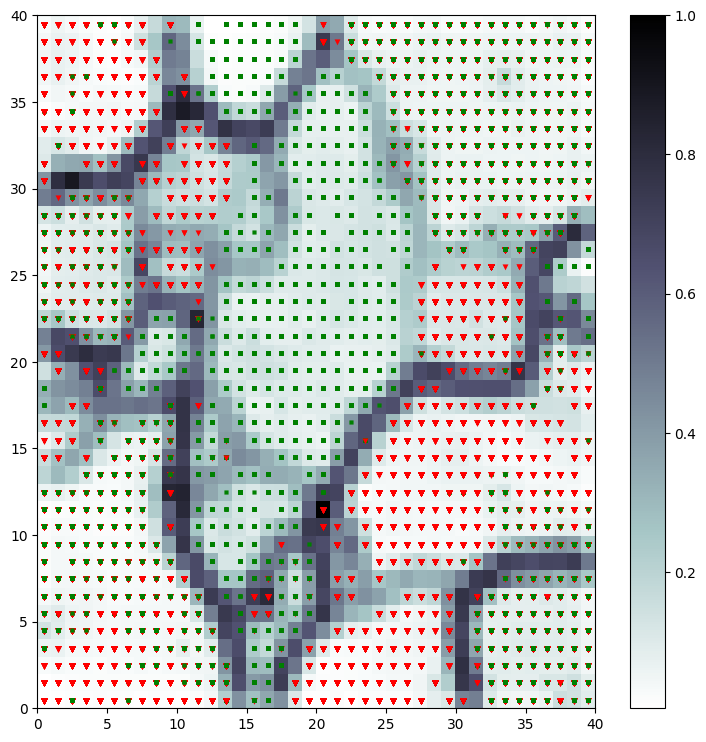

CPU times: user 5min 13s, sys: 4.46 s, total: 5min 17s
Wall time: 5min 17s


In [15]:
%%time
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Tracciamento della risposta per ogni pattern nel dataset processato
# colori e marker differenti per ogni etichetta
markers = ['s', 'v']
colors = ['g', 'r']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor=colors[target[cnt]],
             markeredgecolor=colors[target[cnt]], markersize=1, markeredgewidth=2)

plt.show()

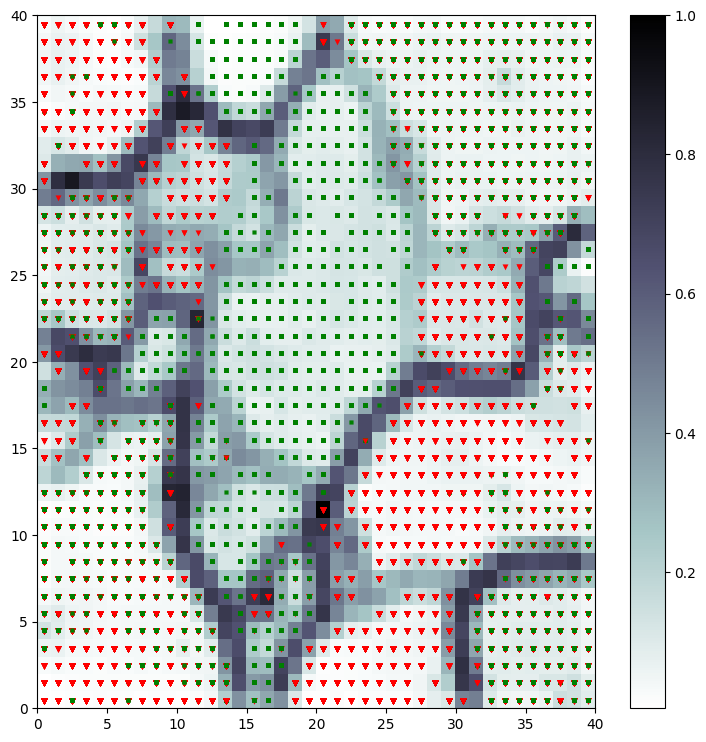

CPU times: user 5min 23s, sys: 4.78 s, total: 5min 28s
Wall time: 5min 28s


In [16]:
%%time
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the processed_friday_dataset
# different colors and markers for each label
markers = ['s', 'v']
colors = ['g', 'r']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor=colors[target[cnt]],
             markeredgecolor=colors[target[cnt]], markersize=1, markeredgewidth=2)

plt.show()